In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install fastbook
import fastbook 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 15.7 MB/s eta 0:00:0000:01


In [2]:
from fastbook import *

In [3]:
from fastai.collab import *
from fastai.tabular.all import *
path=untar_data(URLs.ML_100k)

In [4]:
!ls  /root/.fastai/data/ml-100k/* 

/root/.fastai/data/ml-100k/README	 /root/.fastai/data/ml-100k/u2.test
/root/.fastai/data/ml-100k/allbut.pl	 /root/.fastai/data/ml-100k/u3.base
/root/.fastai/data/ml-100k/mku.sh	 /root/.fastai/data/ml-100k/u3.test
/root/.fastai/data/ml-100k/u.data	 /root/.fastai/data/ml-100k/u4.base
/root/.fastai/data/ml-100k/u.genre	 /root/.fastai/data/ml-100k/u4.test
/root/.fastai/data/ml-100k/u.info	 /root/.fastai/data/ml-100k/u5.base
/root/.fastai/data/ml-100k/u.item	 /root/.fastai/data/ml-100k/u5.test
/root/.fastai/data/ml-100k/u.occupation  /root/.fastai/data/ml-100k/ua.base
/root/.fastai/data/ml-100k/u.user	 /root/.fastai/data/ml-100k/ua.test
/root/.fastai/data/ml-100k/u1.base	 /root/.fastai/data/ml-100k/ub.base
/root/.fastai/data/ml-100k/u1.test	 /root/.fastai/data/ml-100k/ub.test
/root/.fastai/data/ml-100k/u2.base


In [5]:
ratings = pd.read_csv(path/'u.data',delimiter='\t',header=None,
                      names=['user','movie','ratings','timestamp'])


                      


In [6]:
ratings.head()

,user,movie,ratings,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [7]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,
                      names=['user','movie','rating','timestamp'])
ratings.head()

,user,movie,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [8]:
movies =pd.read_csv(path/'u.item',delimiter='|',encoding ='latin-1',usecols=(0,1),
                    names=['movie','title'] ,header=None )

movies.head()

,movie,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [9]:
ratings=ratings.merge(movies)
ratings.head()

,user,movie,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [10]:
dls=CollabDataLoaders.from_df(ratings,item_name='title',bs=64)
dls.show_batch()

,user,title,rating
0,542,My Left Foot (1989),4
1,422,Event Horizon (1997),3
2,311,"African Queen, The (1951)",4
3,595,Face/Off (1997),4
4,617,Evil Dead II (1987),1
5,158,Jurassic Park (1993),5
6,836,Chasing Amy (1997),3
7,474,Emma (1996),3
8,466,Jackie Chan's First Strike (1996),3
9,554,Scream (1996),3


In [11]:
n_users=len(dls.classes['user'])
n_movies=len(dls.classes['title'])
n_factors=5
user_factors = torch.randn(n_users, n_factors)
movie_factors = torch.randn(n_movies, n_factors)

In [12]:
user_factors[1]

tensor([-0.5195,  0.7613, -0.4365,  0.1365,  1.3300])

In [13]:
movie_factors[1]

tensor([-1.1836, -0.5818, -0.5587, -0.4316,  0.2128])

In [14]:
one_hot_3=one_hot(3,n_users).float()


In [15]:
print(user_factors.shape)
print(one_hot_3.shape)

torch.Size([944, 5])
torch.Size([944])


In [16]:
user_factors.t()@one_hot_3

tensor([-0.4586, -0.9915, -0.4052, -0.3621, -0.5908])

In [17]:

        
        
class DotProductBias(Module):
    def __init__(self, n_users, n_movies, n_factors):
        self.user_factors = Embedding(n_users, n_factors)
        self.movie_factors = Embedding(n_movies, n_factors)
        
    def forward(self, x):
        users = self.user_factors(x[:,0])
        movies = self.movie_factors(x[:,1])
        return (users * movies).sum(dim=1)
        

In [18]:
x,y=dls.one_batch()

In [19]:
model=DotProductBias(n_users,n_movies,50)

In [20]:
learn=Learner(dls,model,loss_func=MSELossFlat())


In [21]:
learn.fit_one_cycle(5,5e-3)

epoch,train_loss,valid_loss,time
0,1.344786,1.279100,00:10
1,1.093332,1.109981,00:11
2,0.958258,0.990199,00:10
3,0.814234,0.894916,00:10
4,0.780714,0.882022,00:10


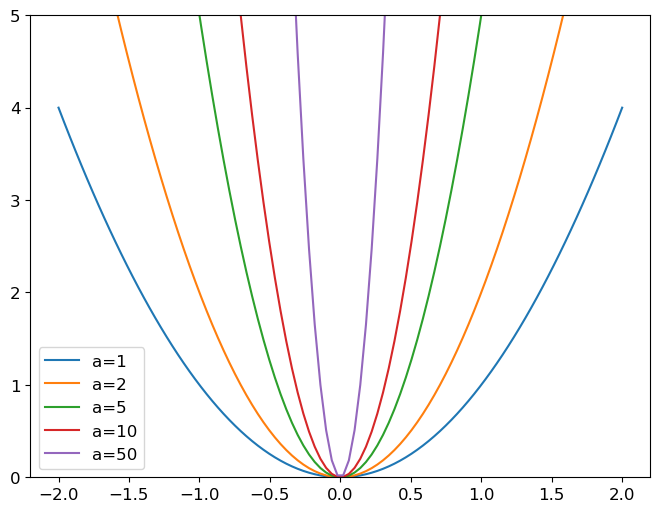

In [22]:
x=np.linspace(-2,2,100)
a_s=[1,2,5,10,50]
ys=[a * x**2  for a in a_s]
_,ax= plt.subplots(figsize=(8,6))
for a ,y in zip(a_s,ys): ax.plot(x,y,label = f'a={a}')
ax.set_ylim([0,5])
ax.legend()

In [23]:
model=DotProductBias(n_users,n_movies,50)
learn=Learner(dls,model,loss_func=MSELossFlat())
learn.fit_one_cycle(10,5e-3 , wd=0.1)

epoch,train_loss,valid_loss,time
0,4.062499,3.460481,00:10
1,1.178460,1.175426,00:10
2,1.119854,1.143774,00:11
3,1.096754,1.130296,00:10
4,1.071326,1.071841,00:11
5,0.975289,1.013572,00:10
6,0.954164,0.966954,00:10
7,0.867553,0.928658,00:10
8,0.852766,0.911036,00:11
9,0.796051,0.910166,00:10


create own embeddings below

In [24]:
class T(Module):
    def __init__(self):self.a=torch.ones(3)
L(T().parameters())

(#0) []

In [25]:
class T(Module):
    def __init__(self): self.a=nn.Parameter(torch.ones(3))
L(T().parameters())

(#1) [Parameter containing:
tensor([1., 1., 1.], requires_grad=True)]

In [26]:
class T(Module):
    def __init__(self):self.a=nn.Linear(1,3,bias=False)
L(T().parameters())

(#1) [Parameter containing:
tensor([[ 0.7341],
        [-0.9273],
        [ 0.4996]], requires_grad=True)]

In [27]:
type(T().a.weight)

torch.nn.parameter.Parameter

In [28]:
def create_params(size):
    return nn.Parameter(torch.zeros(*size).normal_(0,0.1))

In [29]:
class DotProductBias(Module):
    def __init__(self, n_users,n_movies,N_factors,y_range=(0,5.5)):
        self.user_factors=create_params([n_users,n_factors])
        self.movie_factors=create_params([n_movies,n_factors])
        self.user_bias=create_params([n_users])
        self.movie_bias=create_params([n_movies])
        self.y_range=y_range
        
    def forward(self,x):
        users=self.user_factors[x[:,0]]
        movies=self.movie_factors[x[:,1]]
        res= (users*movies).sum(dim=1)
        res+=self.user_bias[x[:,0]] + self.movie_bias[x[:,1]]
        return  sigmoid_range(res,*self.y_range)
        

In [30]:
model=DotProductBias(n_users,n_movies,50)
learn=Learner(dls,model,loss_func=MSELossFlat())
learn.fit_one_cycle(5,5e-3,wd=0.1)

epoch,train_loss,valid_loss,time
0,1.017906,1.028533,00:10
1,0.898539,0.887662,00:11
2,0.856496,0.857145,00:11
3,0.777208,0.850905,00:11
4,0.771071,0.850282,00:10


In [31]:
movie_bias=learn.model.movie_bias.squeeze()
idxs=movie_bias.argsort()[:5]
[dls.classes['title'][i] for i in idxs]


['Children of the Corn: The Gathering (1996)',
 'Lawnmower Man 2: Beyond Cyberspace (1996)',
 'Crow: City of Angels, The (1996)',
 'Home Alone 3 (1997)',
 'Free Willy 3: The Rescue (1997)']

In [32]:
idxs=movie_bias.argsort(descending=True)[:5]
[dls.classes['title'][i] for i in idxs]


["Schindler's List (1993)",
 'Wrong Trousers, The (1993)',
 'Close Shave, A (1995)',
 'Shawshank Redemption, The (1994)',
 'Casablanca (1942)']

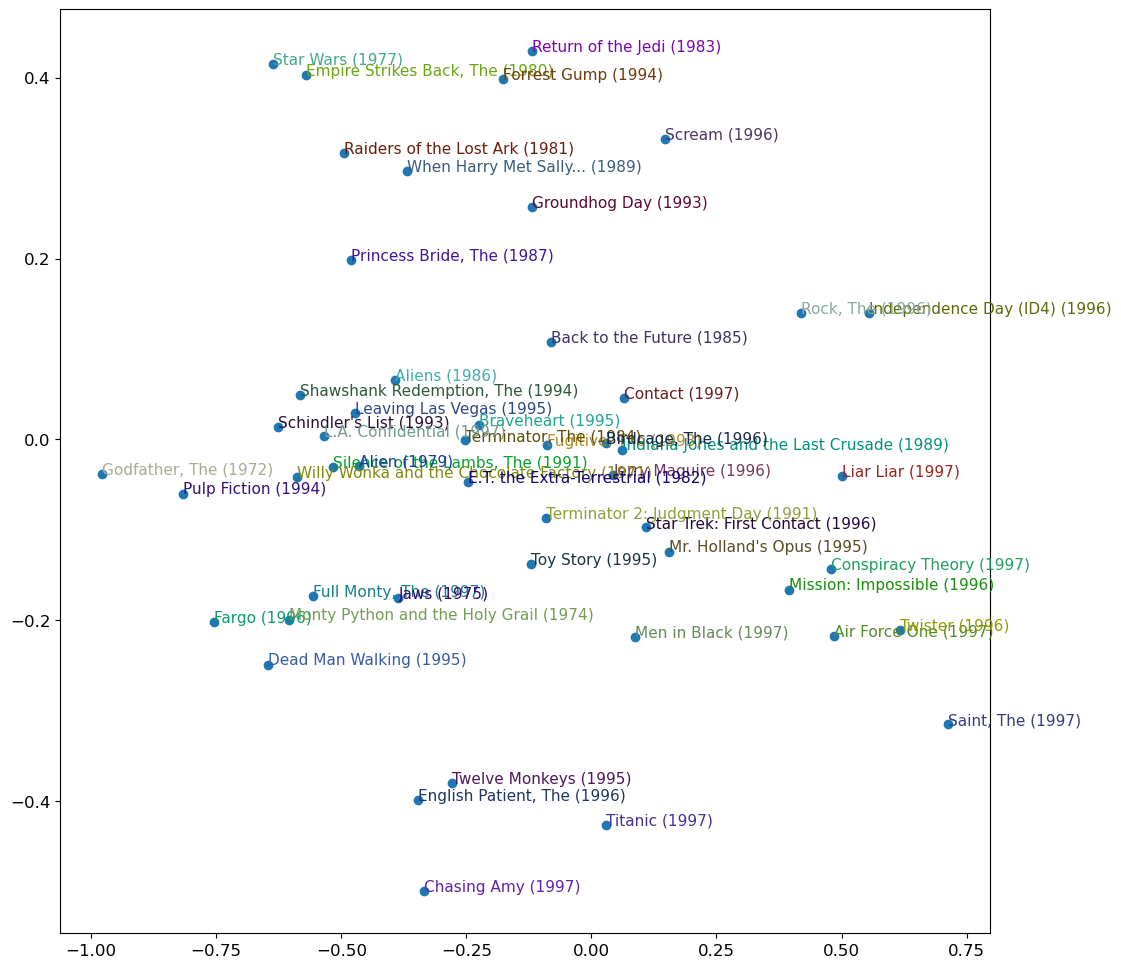

In [33]:

#hide_input
#id img_pca_movie
#caption Representation of movies based on two strongest PCA components
#alt Representation of movies based on two strongest PCA components
g = ratings.groupby('title')['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_idxs = tensor([learn.dls.classes['title'].o2i[m] for m in top_movies])
movie_w = learn.model.movie_factors[top_idxs].cpu().detach()
movie_pca = movie_w.pca(3)
fac0,fac1,fac2 = movie_pca.t()
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(12,12))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

In [34]:
g = ratings.groupby('title')['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_idxs = tensor([learn.dls.classes['title'].o2i[m] for m in top_movies])
learn.model.movie_factors[top_idxs].cpu().detach()

tensor([[ 0.8158, -0.3853,  0.2395, -0.7380, -0.1932],
        [-0.0712,  0.0708,  0.3056, -0.3717, -0.4479],
        [ 0.4363,  0.0844,  0.5737, -0.4027,  0.4122],
        ...,
        [ 0.0224,  0.0540,  0.0889,  0.0355, -0.0834],
        [-0.1514, -0.0484, -0.3594,  0.1684, -0.2898],
        [-0.0581, -0.2245,  0.0129,  0.1228,  0.2133]])

using FASTAI now directly


In [35]:
learn=collab_learner(dls,n_factors=50,y_range=(0,5.5))

In [36]:
learn.fit_one_cycle(5,5e-3,wd=0.1)

epoch,train_loss,valid_loss,time
0,0.932302,0.956346,00:11
1,0.870830,0.882251,00:11
2,0.733298,0.838451,00:11
3,0.596193,0.825527,00:11
4,0.489779,0.824805,00:11


In [37]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 50)
  (i_weight): Embedding(1665, 50)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1665, 1)
)

In [38]:
nn.Parameter(torch.zeros([10]).normal_(0, 0.01))

Parameter containing:
tensor([-0.0232,  0.0086, -0.0101, -0.0166,  0.0098,  0.0041,  0.0063,  0.0033, -0.0042, -0.0059], requires_grad=True)

In [39]:
movie_bias=learn.model.i_bias.weight.squeeze()
idxs= movie_bias.argsort(descending=True)[:5]
[dls.classes['title'][i] for i in idxs]


['Titanic (1997)',
 'Shawshank Redemption, The (1994)',
 'L.A. Confidential (1997)',
 'Silence of the Lambs, The (1991)',
 "Schindler's List (1993)"]

In [40]:
movie_factors=learn.model.i_weight.weight
idx=dls.classes['title'].o2i['Silence of the Lambs, The (1991)']
distances=nn.CosineSimilarity(dim=1)(movie_factors,movie_factors[idx][None])
idx=distances.argsort(descending=True)
dls.classes['title'][idx]

(#1665) ['Silence of the Lambs, The (1991)','Meet John Doe (1941)','Farewell to Arms, A (1932)','For Whom the Bell Tolls (1943)','Rear Window (1954)','Love in the Afternoon (1957)','Sling Blade (1996)','Belle de jour (1967)','Guantanamera (1994)','Dial M for Murder (1954)'...]

In [59]:
embs=get_emb_sz(dls)
embs

[(944, 74), (1665, 102)]

In [60]:
type(embs[0])

tuple

In [51]:
help(get_emb_sz)

Help on function get_emb_sz in module fastai.tabular.model:

get_emb_sz(to: 'Tabular | TabularPandas', sz_dict: 'dict' = None) -> 'list'
    Get embedding size for each cat_name in `Tabular` or `TabularPandas`, or populate embedding size manually using sz_dict



In [64]:

class CollabNN(Module):
    def __init__(self, user_sz, item_sz, y_range=(0,5.5), n_act=100):
        self.user_factors = Embedding(*user_sz)
        self.item_factors = Embedding(*item_sz)
        self.layers = nn.Sequential(
            nn.Linear(user_sz[1]+item_sz[1], n_act),
            nn.ReLU(),
            nn.Linear(n_act, 1))
        self.y_range = y_range
        
    def forward(self, x):
        embs = self.user_factors(x[:,0]),self.item_factors(x[:,1])
        x = self.layers(torch.cat(embs, dim=1))
        return sigmoid_range(x, *self.y_range)
     

In [65]:
model=CollabNN(*embs)

In [66]:
learn=Learner(dls,model,loss_func=MSELossFlat())
learn.fit_one_cycle(5,5e-3,wd=0.1)

epoch,train_loss,valid_loss,time
0,0.957514,0.967260,00:13
1,0.886492,0.923946,00:13
2,0.873313,0.895727,00:13
3,0.852682,0.871177,00:13
4,0.783739,0.871673,00:13
